# Clustering Algorithm In Machine Learning

### <span id="1"></span>  1. What is Clustering?

#### Clustering is the process of dividing the entire data into groups (also known as clusters) based on the patterns in the data.


<img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2019/08/Screenshot-from-2019-08-07-15-19-27.png" class="center">


### <span id="2"></span>  2. What is K-Means Algorithm?

K-Means Clustering is an unsupervised machine learning algorithm used to group similar data points into clusters.

In simple words:

    K-Means divides data into K groups so that points in the same group are more similar to each other than to points in other groups.

### <span id="3"></span>  3. How does the K-Means Algorithm Work?



Step-1: Choose number of clusters K

Step-2: Pick K random points (centroids)

Step-3: Assign each data point to nearest centroid

Step-4: Update centroids

Step-5: Repeat until centroids stop changing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('../Datasets/Mall_Customers.csv')
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
df.rename(columns={'Genre':'gender', 'Age':'age','Annual Income (k$)':'income','Spending Score (1-100)':'score'}, inplace=True)

In [4]:
df

,CustomerID,gender,age,income,score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [5]:
df.shape

(200, 5)

#### Checking Null Value

In [6]:
df.isnull().sum()

CustomerID    0
gender        0
age           0
income        0
score         0
dtype: int64

In [7]:
df.drop('CustomerID', axis = 1,inplace=True)

In [8]:
df

,gender,age,income,score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


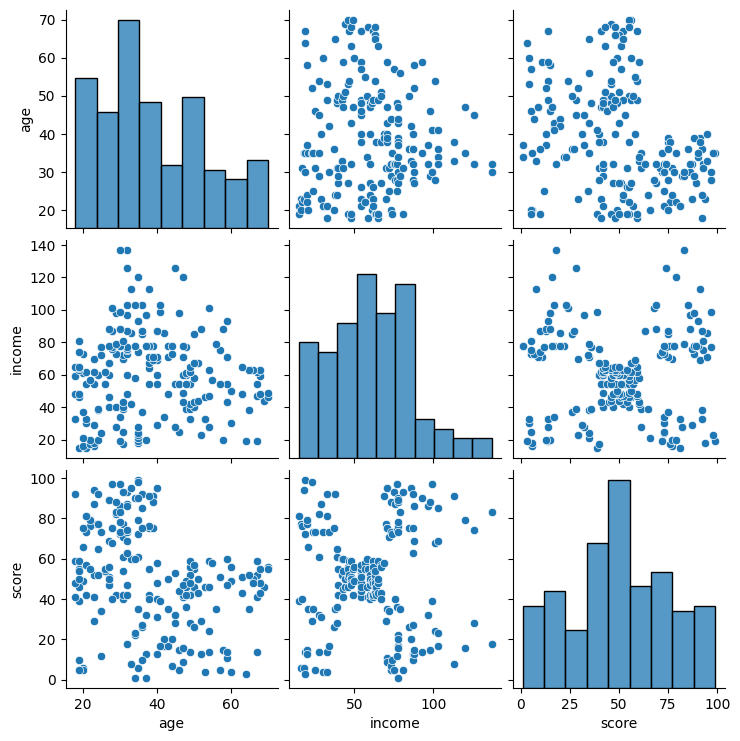

In [9]:
plt.Figure(figsize=(30,20))
sns.pairplot(df)
plt.show()

In [10]:
df[['age','income','score']]

,age,income,score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


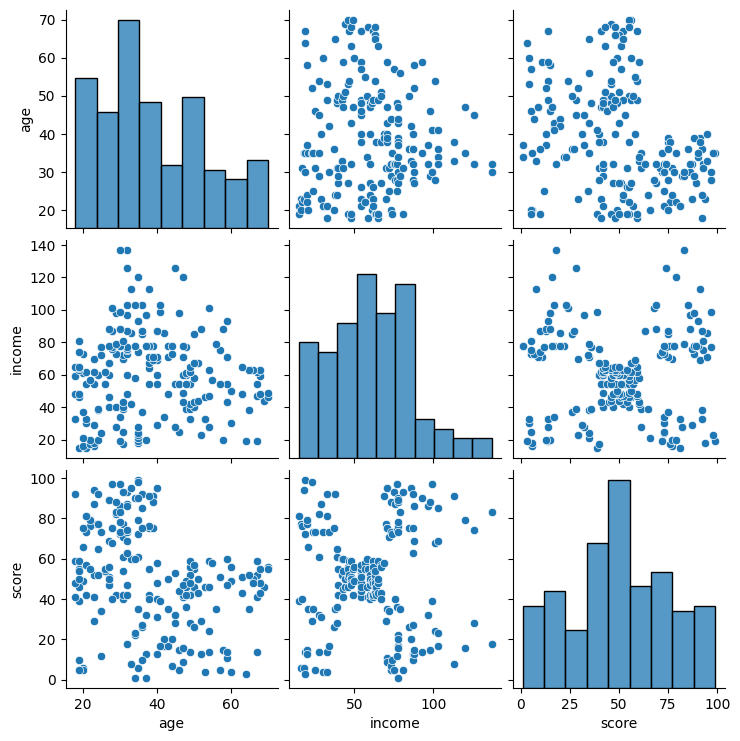

In [11]:
sns.pairplot(df[['age','income','score']])

In [12]:
df.head()

,gender,age,income,score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [13]:
gender_counts = df['gender'].value_counts()
gender_counts

gender
Female    112
Male       88
Name: count, dtype: int64

In [14]:
gender_counts.index

Index(['Female', 'Male'], dtype='object', name='gender')

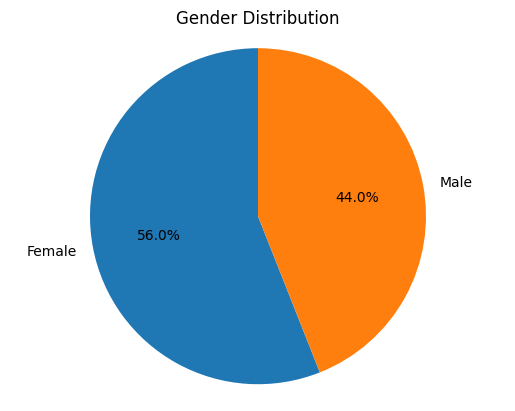

In [15]:
plt.pie(gender_counts, labels=gender_counts.index,autopct='%1.1f%%', startangle=90)
plt.title("Gender Distribution")
plt.axis("equal")
plt.show()

In [16]:
df.head()

,gender,age,income,score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [17]:
x = df.drop(['age','gender'], axis = 1)
x

,income,score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [19]:
scaler

StandardScaler()

In [20]:
scaled_data = scaler.fit_transform(x)

Text(0.5, 1.0, 'After Standard Scaling')

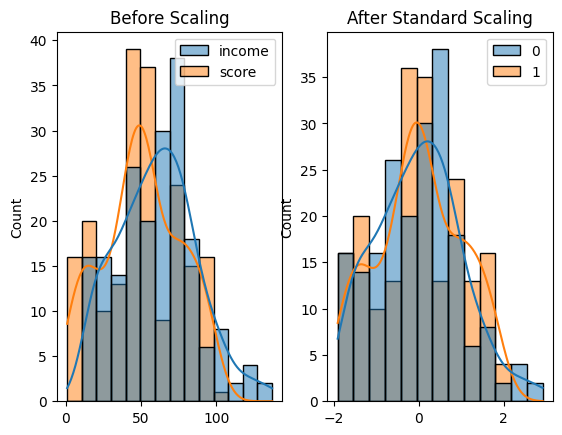

In [21]:
plt.subplot(1,2,1)
sns.histplot(x, kde=True)
plt.title("Before Scaling")

plt.subplot(1,2,2)
sns.histplot(scaled_data, kde=True)
plt.title("After Standard Scaling")

In [22]:
from sklearn.cluster import KMeans

In [23]:
kmeans = KMeans(n_clusters = 5,init="k-means++")

In [24]:
kmeans = kmeans.fit(scaled_data)

In [25]:
kmeans.cluster_centers_

array([[ 1.05500302, -1.28443907],
       [-0.20091257, -0.02645617],
       [-1.30751869, -1.13696536],
       [ 0.99158305,  1.23950275],
       [-1.32954532,  1.13217788]])

In [26]:
df['clusters'] = kmeans.labels_

In [27]:
df['clusters']

0      2
1      4
2      2
3      4
4      2
      ..
195    3
196    0
197    3
198    0
199    3
Name: clusters, Length: 200, dtype: int32

In [28]:
df.head(22)

,gender,age,income,score,clusters
0,Male,19,15,39,2
1,Male,21,15,81,4
2,Female,20,16,6,2
3,Female,23,16,77,4
4,Female,31,17,40,2
5,Female,22,17,76,4
6,Female,35,18,6,2
7,Female,23,18,94,4
8,Male,64,19,3,2
9,Female,30,19,72,4


In [29]:
df['clusters'].value_counts()

clusters
1    81
3    39
0    35
2    23
4    22
Name: count, dtype: int64

<Axes: xlabel='income', ylabel='score'>

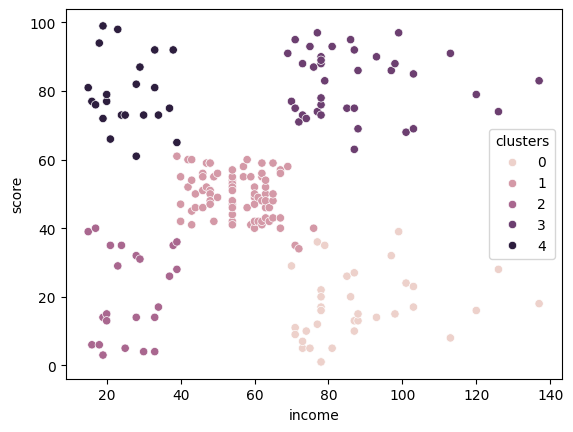

In [30]:
sns.scatterplot(x ='income', y='score', hue='clusters', data=df)

In [31]:
## Elbow method To select K Value

k_range =range(1,15)
wcss = []

for k in k_range:
    knn = KMeans(n_clusters=k,init="k-means++")
    knn.fit(scaled_data)
    wcss.append(knn.inertia_)

In [32]:
wcss

[400.0,
 272.85642655248995,
 226.97323439557886,
 108.92131661364355,
 65.56840815571681,
 55.37581558455638,
 50.57778025976604,
 42.37949632793096,
 34.803425789372966,
 32.47646597148909,
 26.466196438721823,
 23.565932183428455,
 25.78120745506849,
 22.15408947802469]

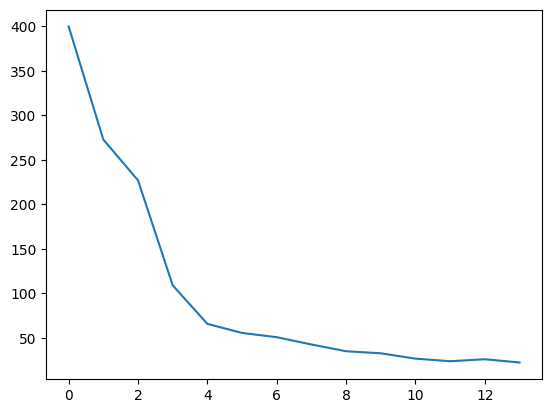

In [33]:
plt.plot(wcss)

Text(0.5, 1.0, 'Tennis Elbow Courve')

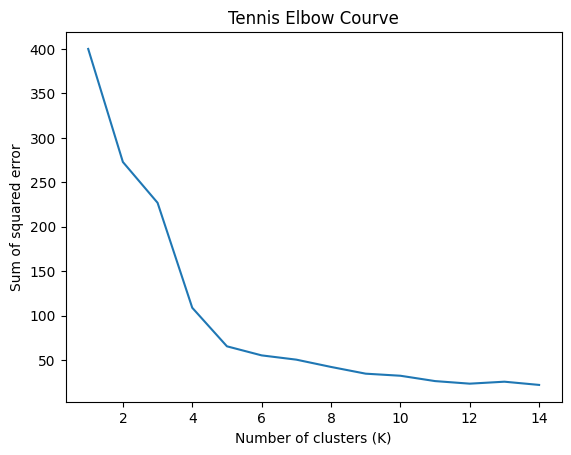

In [34]:
plt.xlabel('Number of clusters (K)') 
plt.ylabel('Sum of squared error') 
plt.plot(k_range,wcss) 
plt.title('Tennis Elbow Courve') 

In [35]:
y_pred=kmeans.predict()

TypeError: _BaseKMeans.predict() missing 1 required positional argument: 'X'

In [ ]:
K_range = range(1,20)
wcss2 = []

In [ ]:
for k in K_range:
    km = KMeans(n_clusters=k)
    km.fit(df[['age','score']])
    wcss2.append(km.inertia_) #Inertia_ is the sum of squared error for each cluster.

In [ ]:
wcss2

[171535.50000000003,
 75949.15601023012,
 45840.67661610871,
 28165.583566629342,
 23900.961527828902,
 19502.407839362197,
 15578.191886608018,
 13012.800984809697,
 11510.8384658681,
 10207.661348822032,
 9320.788340008805,
 8670.94744914528,
 7906.813551747346,
 7297.317976536712,
 6824.541480755674,
 6004.772952743851,
 5949.191458283719,
 5225.606796308265,
 5022.898489010988]

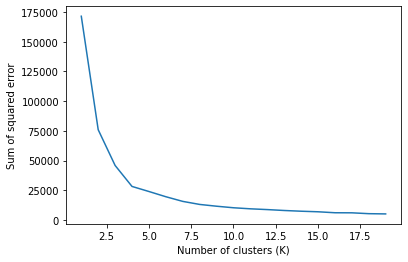

In [ ]:
plt.xlabel('Number of clusters (K)')
plt.ylabel('Sum of squared error')
plt.plot(K_range,wcss2)

In [ ]:
kmeans2 = cluster.KMeans(n_clusters = 4)

In [ ]:
kmeans2 = kmeans2.fit(df[['age','score']])

In [ ]:
kmeans2.cluster_centers_

array([[27.61702128, 49.14893617],
       [30.1754386 , 82.35087719],
       [55.70833333, 48.22916667],
       [43.29166667, 15.02083333]])

In [ ]:
df['age_clusters'] = kmeans2.labels_

In [ ]:
df['age_clusters'].value_counts()

1    57
3    48
2    48
0    47
Name: age_clusters, dtype: int64

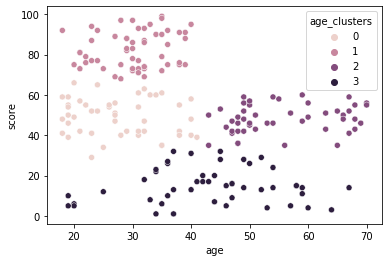

In [ ]:
seaborn.scatterplot(x='age', y='score',hue='age_clusters',data=df)